# Add surfaces to an object
Here, we show a procedure to add an structured surface to an object. The surafaces are to lenses. The first one is an Frsnel lens, and the second surface is an stardard lens.

Two examples are performed. Add the surfaces to a layer and to a biprism

In [36]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X

In [37]:
x0 = np.linspace(-.15*mm, .15*mm, 1024)
z0 = np.linspace(-25*um, 400*um, 512)
wavelength = 5*um
n_background = 1


In [38]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave()

##  Surfaces


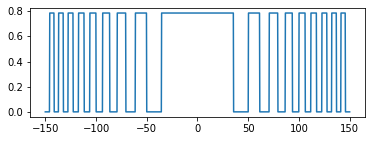

In [39]:
surface_1 = Scalar_mask_X(x0, wavelength, n_background=1, info='')

h1 = surface_1.fresnel_lens(x0=0.0,
                            focal=.25*mm,
                            binary=True,
                            kind='phase',
                            phase=sp.pi/2,
                            radius=1*mm)

plt.figure(figsize=(6, 2))
plt.plot(surface_1.x, h1.real)


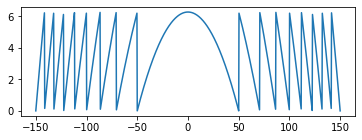

In [40]:
surface_2 = Scalar_mask_X(x0, wavelength, n_background=1, info='')
h2 = surface_2.fresnel_lens(x0=0.0,
                            focal=.25*mm,
                            binary=False,
                            kind='phase',
                            phase=sp.pi/2,
                            radius=1*mm)

plt.figure(figsize=(6, 2))
plt.plot(surface_2.x, h2.real)


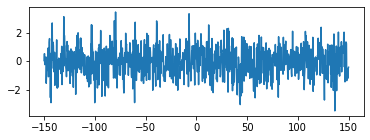

In [41]:
surface_3 = Scalar_mask_X(x0, wavelength, n_background=1, info='')
h3 = surface_3.roughness(t=.25*um, s=1*um)

plt.figure(figsize=(6, 2))
plt.plot(surface_3.x, h3.real)

In [42]:
fx1 = surface_1.x, h1 * wavelength
fx2 = surface_2.x, h2 * wavelength
fx3 = surface_3.x, h3 * wavelength

## Layer

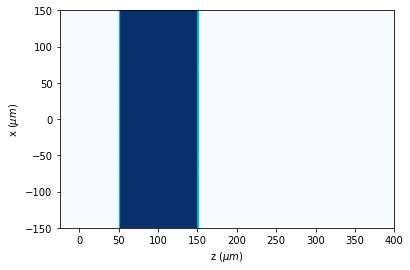

In [43]:
layer = Scalar_mask_XZ(x0, z0, wavelength, n_background=n_background, info='')
#lente3.biprism(r0=(0*um, 0*um), length=.3*mm, height=.25*mm, refractive_index=1.5);
layer.layer(r0=(0*mm, 50*um),
            refractive_index=1.5,
            depth=100*um,
            angle=0)
layer.draw_refractive_index()

In [44]:
layer.add_surfaces(fx=(fx1, fx2),
                   refractive_index=1.5,
                   x_sides=[-1*mm, 1*mm],
                   min_incr=0.1,
                   angle=0*degrees)


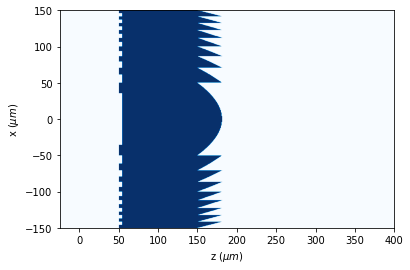

In [45]:
layer.draw_refractive_index(draw_borders=False)

borders = layer.borders

layer.smooth_refractive_index(pixels_filtering=2*um,
                              draw_check=False,
                              max_diff_filter=0.1)


**Propagation**

In [46]:
layer.incident_field(u0)

In [47]:
layer.clear_field()
layer.BPM(verbose=True, has_edges=False)

Time = 0.12 s, time/loop = 0.2291 ms


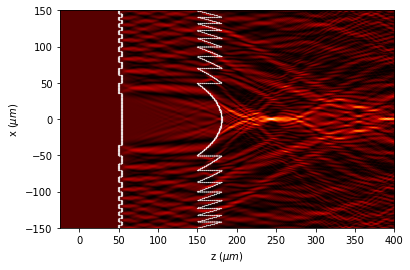

In [48]:
layer.draw(logarithm=1e0, normalize='maximum', draw_borders=True, edge_matrix=borders)


## Biprism

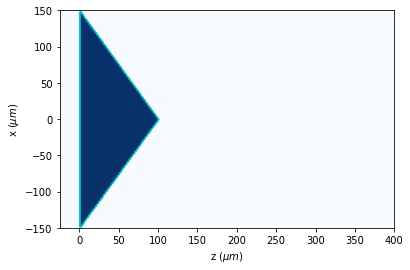

In [73]:
biprism = Scalar_mask_XZ(x0,
                         z0,
                         wavelength,
                         n_background=n_background,
                         info='')
biprism.biprism(r0=(0*um, 0*um),
                length=.3*mm,
                height=.1*mm,
                refractive_index=1.5)
biprism.draw_refractive_index()
borders = biprism.borders


In [74]:
biprism.incident_field(u0)

Time = 0.12 s, time/loop = 0.2382 ms


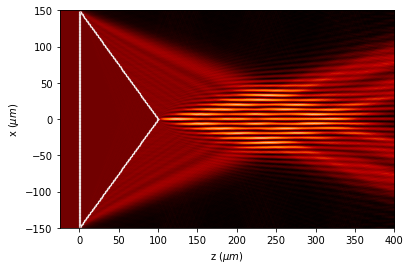

In [75]:
biprism.clear_field()
biprism.BPM(verbose=True, has_edges=False)
biprism.draw(logarithm=1e0,  draw_borders=True, edge_matrix=borders)


In [76]:
biprism.add_surfaces(fx=(fx3, fx1),
                     refractive_index=1.5,
                     x_sides=[-1*mm, 1*mm],
                     min_incr=0.1,
                     angle=0*degrees)


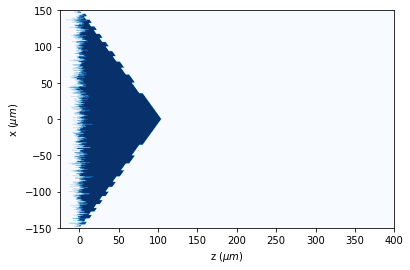

In [77]:
biprism.draw_refractive_index(draw_borders=False)
borders = biprism.borders

In [78]:
biprism.smooth_refractive_index(pixels_filtering=2*um,
                                draw_check=False,
                                max_diff_filter=0.1)


**Propagation**

Time = 0.15 s, time/loop = 0.2861 ms


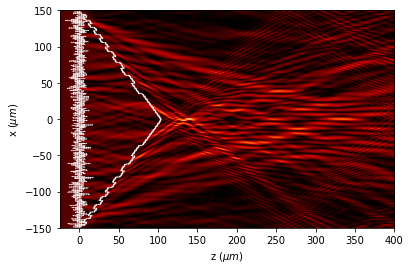

In [79]:
biprism.clear_field()
biprism.BPM(verbose=True, has_edges=False)
biprism.draw(logarithm=1e0,  draw_borders=True, edge_matrix=borders)
